(968,) (968, 60)
(320,) (320, 60)
(320,) (320, 60)
(1288,) (1288, 60)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
算法1：逻辑回归
算法1：逻辑回归 训练集得分: 0.936983
算法1：逻辑回归 验证集得分: 0.940625
算法1：逻辑回归 测试集得分: 0.918750
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
算法2：支持向量机
算法2：支持向量机 训练集得分: 0.991736
算法2：支持向量机 验证集得分: 0.975000
算法2：支持向量机 测试集得分: 0.950000
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
算法3：朴素贝叶斯
算法3：朴素贝叶斯 训练集得分: 0.806818
算法3：朴素贝叶斯 验证集得分: 0.778125
算法3：朴素贝叶斯 测试集得分: 0.806250
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
算法4：决策树
算法4：决策树 训练集得分: 1.000000
算法4：决策树 验证集得分: 0.865625
算法4：决策树 测试集得分: 0.868750
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


<Figure size 432x288 with 0 Axes>

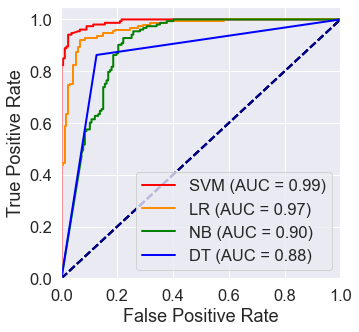

In [6]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 评价指标函数 metrics
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 评价指标函数 model_selection
from sklearn.model_selection import cross_val_score    # 交叉验证
from sklearn.model_selection import StratifiedKFold    # K折交叉验证
from sklearn.model_selection import GridSearchCV       # 网格搜索

# ------------------------------------------------------------------------------------------------------------------------------
# 算法：逻辑回归
from sklearn.linear_model import LogisticRegression    # sklearn - 逻辑回归算法


# 算法：支持向量机SVM
from sklearn import svm             # sklearn - 支持向量机SVM算法
from sklearn.svm import SVC
# from sklearn.svm import LinearSVC


# 算法：随机森林
from sklearn.ensemble import RandomForestClassifier           # sklearn - 随机森林


# 算法：决策树
from sklearn import tree           # sklearn - 决策树


# 算法：朴素贝叶斯
from sklearn.naive_bayes import GaussianNB           # sklearn - 朴素贝叶斯


# 算法：最小二乘法
from sklearn import linear_model   # sklearn - 最小二乘法

# ------------------------------------------------------------------------------------------------------------------------------
# 去除警告
import warnings
warnings.filterwarnings('ignore') #将警告滤掉

# 设置显示的行数和列数
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# ------------------------------------------------------------------------------------------------------------------------------

# 读取CSV文件
train_sheet = pd.read_csv('G:/StudyFile/PycharmProjects/pythonStudy/FallDetection/data/biaozhun-train.csv')
train_data = train_sheet

val_sheet = pd.read_csv('G:/StudyFile/PycharmProjects/pythonStudy/FallDetection/data/biaozhun-validation.csv')
val_data = val_sheet

test_sheet = pd.read_csv('G:/StudyFile/PycharmProjects/pythonStudy/FallDetection/data/biaozhun-test.csv')
test_data = test_sheet

cross_sheet = pd.read_csv('G:/StudyFile/PycharmProjects/pythonStudy/FallDetection/data/biaozhun-cross.csv')
cross_data = cross_sheet

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

y_train = np.array(train_data['label'])
x_train = train_data.drop(['record', 'label'], axis=1)
print(y_train.shape, x_train.shape)

y_val = np.array(val_data['label'])
x_val = val_data.drop(['record', 'label'], axis=1)
print(y_val.shape, x_val.shape)

y_test = np.array(test_data['label'])
x_test = test_data.drop(['record', 'label'], axis=1)
print(y_test.shape, x_test.shape)

y_cross = np.array(cross_data['label'])
x_cross = cross_data.drop(['record', 'label'], axis=1)
print(y_cross.shape, x_cross.shape)






# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")
print("算法1：逻辑回归")
clf1 = LogisticRegression(penalty='l2',C=60,solver='liblinear')         # 此处这个函数中有很多参数可供选择
clf1 = clf1.fit(x_train,y_train)     # 训练模型


# 训练集train
print("算法1：逻辑回归 训练集得分: %f"%clf1.score(x_train,y_train))

# 验证集validation
print("算法1：逻辑回归 验证集得分: %f"%clf1.score(x_val,y_val))

# 测试集test
print("算法1：逻辑回归 测试集得分: %f"%clf1.score(x_test, y_test))



# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")
print("算法2：支持向量机")
clf2 = svm.SVC(kernel='rbf',C=1.6,gamma=0.03,probability=True)
clf2.fit(x_train,y_train)  # 训练集train训练模型


print("算法2：支持向量机 训练集得分: %f"%clf2.score(x_train,y_train))
print("算法2：支持向量机 验证集得分: %f"%clf2.score(x_val,y_val))
print("算法2：支持向量机 测试集得分: %f"%clf2.score(x_test,y_test))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")
print("算法3：朴素贝叶斯")
clf3 = GaussianNB()
clf3 = clf3.fit(x_train,y_train)    # 训练集train训练模型

print("算法3：朴素贝叶斯 训练集得分: %f"%clf3.score(x_train,y_train))
print("算法3：朴素贝叶斯 验证集得分: %f"%clf3.score(x_val,y_val))
print("算法3：朴素贝叶斯 测试集得分: %f"%clf3.score(x_test,y_test))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")
print("算法4：决策树")
clf4 = tree.DecisionTreeClassifier()
clf4 = clf4.fit(x_train,y_train)    # 训练集train训练模型

print("算法4：决策树 训练集得分: %f"%clf4.score(x_train,y_train))
print("算法4：决策树 验证集得分: %f"%clf4.score(x_val,y_val))
print("算法4：决策树 测试集得分: %f"%clf4.score(x_test,y_test))

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")









# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# 算法1：支持向量机
# roc/auc计算
y_score = clf2.predict_proba(x_test)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr,tpr)
sns.set(font_scale=1.5)
sns.set_style("darkgrid")

# 绘制roc曲线
plt.figure()
lw = 2
plt.figure(figsize=(5,5))


plt.plot(fpr, tpr, color='red',
         lw=lw, label='SVM (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.legend(loc="lower right")


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# 算法2：逻辑回归
# roc/auc计算
y_score = clf1.predict_proba(x_test)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr,tpr)
sns.set(font_scale=1.5)
sns.set_style("darkgrid")

# 绘制roc曲线
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='LR (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.legend(loc="lower right")

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# 算法3：朴素贝叶斯
# roc/auc计算
y_score = clf3.predict_proba(x_test)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr,tpr)
sns.set(font_scale=1.5)
sns.set_style("darkgrid")

# 绘制roc曲线
plt.plot(fpr, tpr, color='green',
         lw=lw, label='NB (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')



plt.legend(loc="lower right")




# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# 算法3：决策树
# roc/auc计算
y_score = clf4.predict_proba(x_test)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr,tpr)
sns.set(font_scale=1.5)
sns.set_style("darkgrid")

# 绘制roc曲线
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='DT (AUC = 0.88)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')



plt.legend(loc="lower right")
plt.show()


